![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [192]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [193]:
breast_cancer = pd.read_csv(breast_cancer_csv)

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [194]:
# Head
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [195]:
breast_cancer.shape

(569, 33)

In [196]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [197]:
breast_cancer.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [198]:
# All values are null. We'll drop them.
breast_cancer.drop(labels='Unnamed: 32', axis=1, inplace=True)

In [199]:
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [200]:
breast_cancer['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

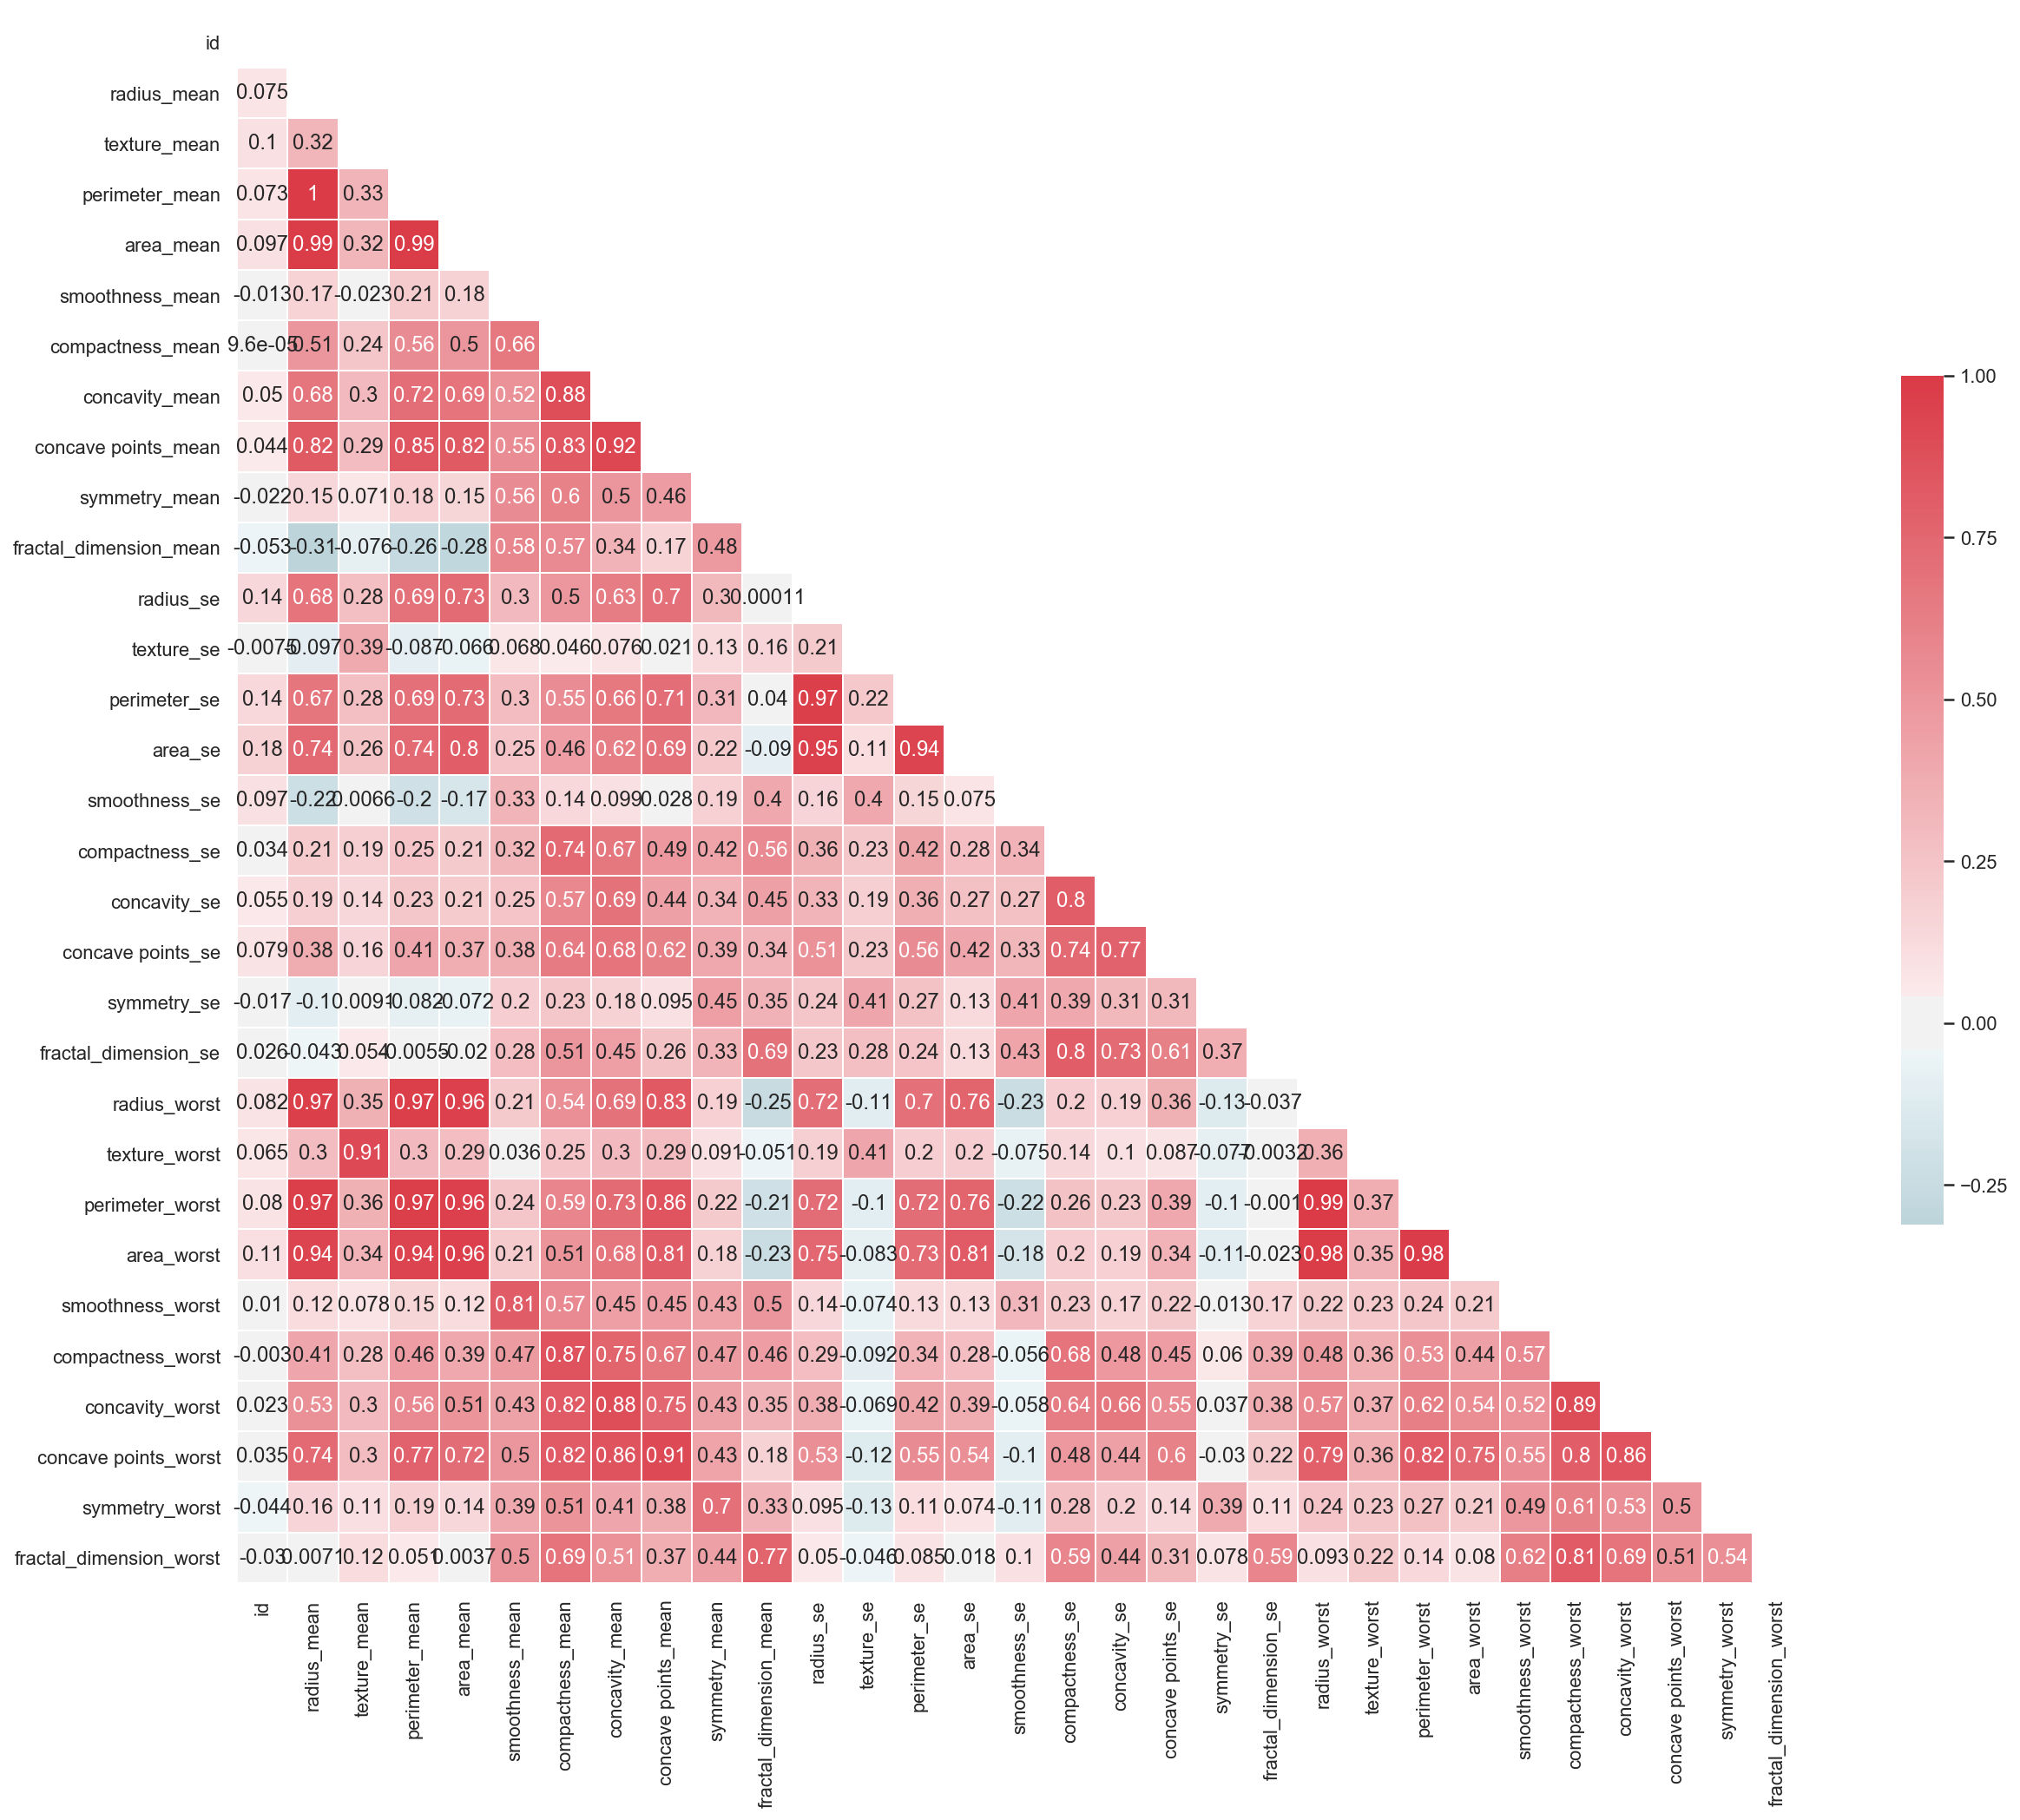

In [201]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(breast_cancer.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(breast_cancer.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [202]:
breast_cancer['diagnosis'].head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [203]:
diagnosis_map = {
     'B': 0
     , 'M': 1}
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(diagnosis_map)

In [204]:
breast_cancer['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [205]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

target_col = 'diagnosis'
features_col = [c for c in breast_cancer.columns if c != 'diagnosis']

X = breast_cancer[features_col]
y = breast_cancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=32)

model = LogisticRegression()
model.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [206]:
# predict test class:

y_pred = model.predict(X_test)

# predicted test probability:

y_prob = model.predict_proba(X_test)

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [207]:
# ANSWER
con_mat = confusion_matrix(y_test, y_pred, )

In [208]:
# Let's say again that we are predicting cancer based on some kind of detection measure, as before.
confusion = pd.DataFrame(con_mat, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,2,85
is_healthy,2,54


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [209]:
# ANSWER
# use float to perform true division, not integer division
print(metrics.accuracy_score(y_test,y_pred))

0.3916083916083916


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [210]:
# ANSWER
print(1-metrics.accuracy_score(y_test,y_pred))

0.6083916083916083


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [211]:
# ANSWER
sensitivity = metrics.recall_score(y_test, y_pred)
print(sensitivity)

0.9642857142857143


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [212]:
# ANSWER
TP = confusion_matrix(y_test, y_pred)[1, 1]
TN = confusion_matrix(y_test, y_pred)[0, 0]
FP = confusion_matrix(y_test, y_pred)[0, 1]
FN = confusion_matrix(y_test, y_pred)[1, 0]

specificity = TN / (TN + FP)
specificity

0.022988505747126436

#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [213]:
print(1 - specificity)

0.9770114942528736


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [214]:
print(metrics.precision_score(y_test, y_pred))

0.38848920863309355


#### 3.10 Create a predicted test probability dataframe with column name 'class_0_pp','class_1_pp'

In [215]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)# Get the predicted probability vector and explicitly name the columns:
Y_pp = pd.DataFrame(model.predict_proba(X_test), columns=['class_B_pp','class_M_pp'])
Y_pp.head(10)

,class_B_pp,class_M_pp
0,0.472949,0.527051
1,0.474328,0.525672
2,0.463337,0.536663
3,0.441505,0.558495
4,0.462280,0.537720
5,0.458428,0.541572
6,0.456616,0.543384
7,0.476033,0.523967
8,0.451401,0.548599
9,0.452518,0.547482


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [216]:
from sklearn.metrics import roc_curve, auc

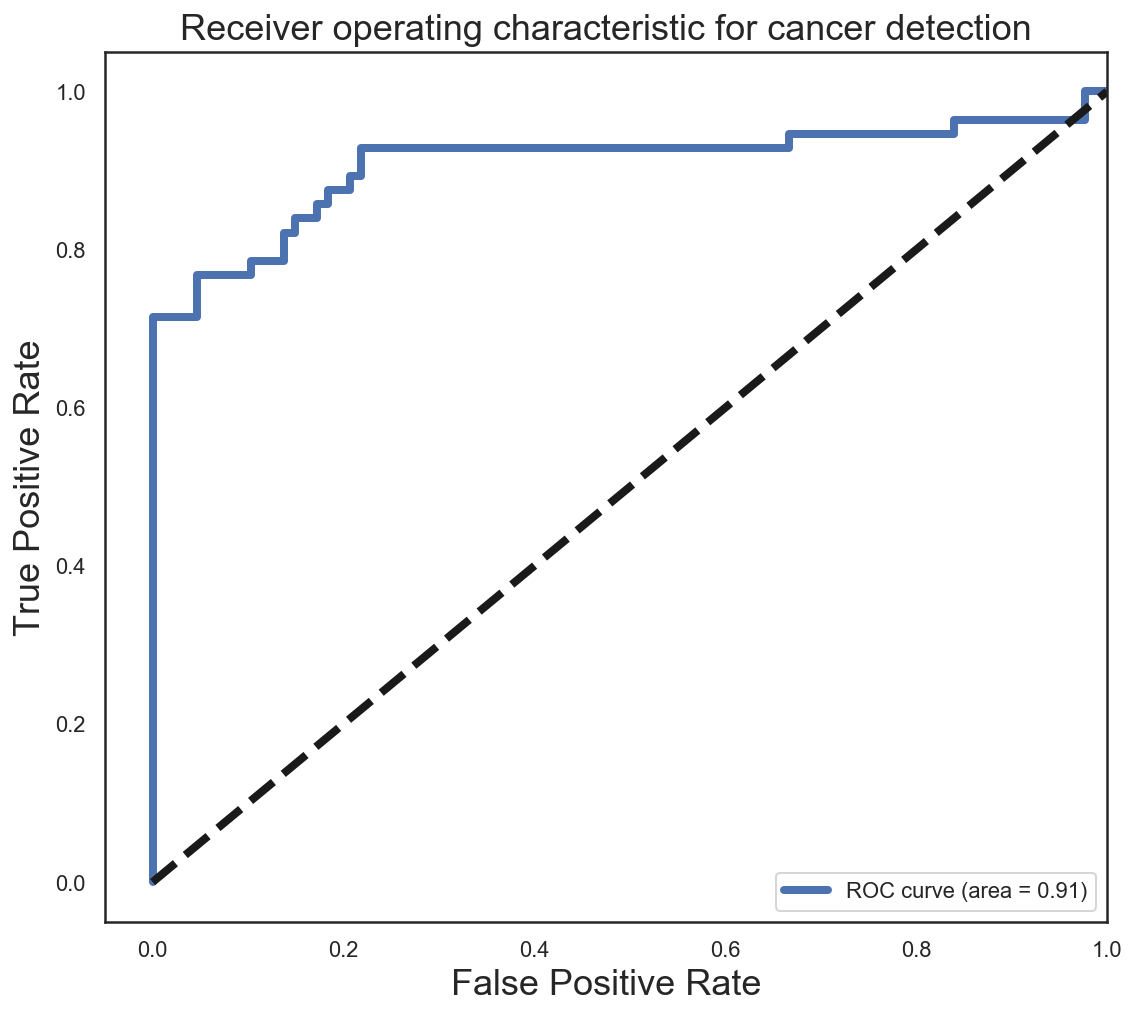

In [217]:
# For class 1, find the area under the curve
fpr, tpr, _ = roc_curve(y_test, Y_pp['class_M_pp'])
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

**© 2019 Data Science Institute of Australia**